+---------------------+-----------+
| Token Type          | Symbol    |
+=====================+===========+
| Whitespace          |           |
+---------------------+-----------+
| UNKNOWN             | #         |
+---------------------+-----------+
| Identifier          | include   |
+---------------------+-----------+
| Whitespace          |           |
+---------------------+-----------+
| Comparison operator | <         |
+---------------------+-----------+
| Identifier          | iostream  |
+---------------------+-----------+
| Comparison operator | >         |
+---------------------+-----------+
| Whitespace          |           |
+---------------------+-----------+
| Identifier          | using     |
+---------------------+-----------+
| Whitespace          |           |
+---------------------+-----------+
| Identifier          | namespace |
+---------------------+-----------+
| Whitespace          |           |
+---------------------+-----------+
| Identifier          | std 

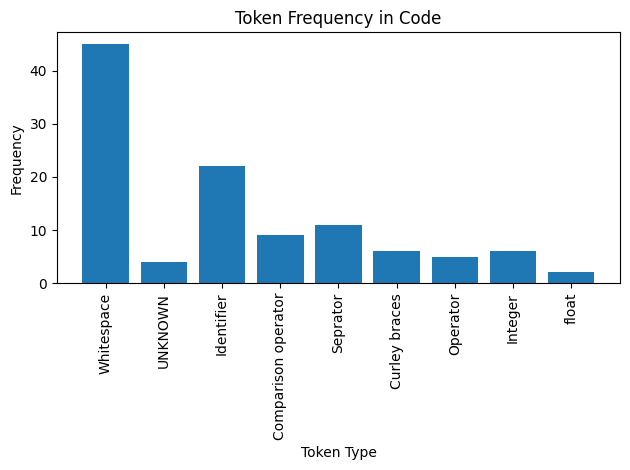

In [18]:
import re
import matplotlib.pyplot as plt
from tabulate import tabulate

def get_tokens():
    tokens = [
        ('Integer', r'\d+'),
        ('float', r'\d+\.\d*|\d*\.\d+'),  # Modified pattern for floats
        ('Identifier', r'[a-zA-Z_]\w*'),
        ('Operator', r'[-+*/=]'),
        ('Keyword', r'if|else|while|for'),
        ('Seprator', r'[(),;]'),
        ('Whitespace', r'\s+'),
        ('Curley braces', r'[{}]'),  # Pattern for curly braces
        ('Comparison operator', r'[<>]'), # Pattern for angle brackets
        ('UNKNOWN', r'.')
    ]
    return tokens

def tokenize(code):
    tokens_list = []
    position = 0
    tokens = get_tokens()

    while position < len(code):
        match = None
        for token_type, pattern in tokens:
            regex = re.compile(pattern)
            match = regex.match(code, position)
            if match:
                value = match.group(0)
                if token_type != 'WHITESPACE':  # Ignore whitespace tokens
                    tokens_list.append((token_type, value))
                position = match.end()
                break

        if not match:
            raise ValueError(f'Invalid token at position {position}: {code[position]}')

    return tokens_list

code = '''
#include <iostream>
using namespace std;

int main() {
    int x = 5;
    float y = 2.5;

    if (x > 5) {
        y = 2.5;
    } else {
        y = x * 3;
    }

    cout << "Result: " << y << endl;

    return 0;
}
'''

# Get code input from user
#code = input("Enter your code: ")

tokens_list = tokenize(code)

# Create table data
table_data = [(token_type, symbol) for token_type, symbol in tokens_list]

# Display table
table_headers = ['Token Type', 'Symbol']
table = tabulate(table_data, headers=table_headers, tablefmt='grid')
print(table)

token_freq = {}
for token_type, _ in tokens_list:
    token_freq[token_type] = token_freq.get(token_type, 0) + 1

plt.bar(token_freq.keys(), token_freq.values())
plt.xlabel('Token Type')
plt.ylabel('Frequency')
plt.title('Token Frequency in Code')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.tight_layout()  # Adjust spacing
plt.show()